In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (6,6)

In [2]:
df = pd.read_csv('data/rent_2.csv')
df.head()

,Unnamed: 0,Price,Pid,Property_name,Address,Neighboorhood
0,0,400000,H1190,1 bedroom mini flat Flat / Apartment for rent ...,Fidiso Estate Abijo Ajah Lagos,Ajah
1,1,14000000,G7398,3 bedroom Flat / Apartment for rent Gerrard Ge...,Gerrard Gerrard Gerard Road Ikoyi Lagos,Ikoyi
2,2,200000,H5843,1 bedroom mini flat Flat / Apartment for rent ...,Obadia Akoka Yaba Lagos,Yaba
3,3,800000,H1194,2 bedroom Flat / Apartment for rent Iju Ishaga...,surulere Iju Ishaga Road Gbaja Surulere Lagos,Surulere
4,4,300000,H5842,1 bedroom mini flat Flat / Apartment for rent ...,Close to Unilag Abule Oja Yaba Lagos,Yaba


In [3]:
df.shape

(9853, 6)

In [4]:
df.isnull().sum()

Unnamed: 0       0
Price            0
Pid              0
Property_name    0
Address          0
Neighboorhood    0
dtype: int64

In [5]:
df = df.drop(['Unnamed: 0', 'Pid', 'Address'], axis='columns')
df.tail(5)

,Price,Property_name,Neighboorhood
9848,400000,1 bedroom mini flat Flat / Apartment for rent ...,Yaba
9849,800000,3 bedroom Flat / Apartment for rent Onike Yaba...,Yaba
9850,1000000,2 bedroom Flat / Apartment for rent Adekunle Y...,Yaba
9851,1500000,3 bedroom Duplex for rent Off Chief Echegile S...,Ogudu
9852,4000000,8 bedroom Duplex for rent babs Animashuam Bode...,Surulere


In [6]:
# df['Price'] = df.Price.apply(lambda x: f'{x:,}')
# df.head()

In [7]:
def get_type(x):
    if 'mini flat' in x.lower():
        c = 'mini flat'
    elif 'flat' in x.lower():
        c = 'flat'
    elif 'self contain' in x.lower():
        c = 'self contain'
    elif 'duplex' in x.lower():
        c = 'duplex'
    elif 'bungalow' in x.lower():
        c = 'bungalow'
    elif 'office space' in x.lower():
        c = 'office space'
    elif 'commercial property' in x.lower():
        c = 'commercial property'
    elif 'house' in x.lower():
        c = 'duplex'
    elif 'shop' in x.lower():
        c = 'shop'
    else:
        c = 'others'
    return c
    

In [8]:
df['property_type'] = df.Property_name.apply(get_type)
df.head(5)

,Price,Property_name,Neighboorhood,property_type
0,400000,1 bedroom mini flat Flat / Apartment for rent ...,Ajah,mini flat
1,14000000,3 bedroom Flat / Apartment for rent Gerrard Ge...,Ikoyi,flat
2,200000,1 bedroom mini flat Flat / Apartment for rent ...,Yaba,mini flat
3,800000,2 bedroom Flat / Apartment for rent Iju Ishaga...,Surulere,flat
4,300000,1 bedroom mini flat Flat / Apartment for rent ...,Yaba,mini flat


In [9]:
def is_num(x):
    tokens = x.split(' ')[0]
    try:
        int(tokens)
    except:
        return False
    return True

In [10]:
df2 = df[df.Property_name.apply(is_num)]
df2.head()

,Price,Property_name,Neighboorhood,property_type
0,400000,1 bedroom mini flat Flat / Apartment for rent ...,Ajah,mini flat
1,14000000,3 bedroom Flat / Apartment for rent Gerrard Ge...,Ikoyi,flat
2,200000,1 bedroom mini flat Flat / Apartment for rent ...,Yaba,mini flat
3,800000,2 bedroom Flat / Apartment for rent Iju Ishaga...,Surulere,flat
4,300000,1 bedroom mini flat Flat / Apartment for rent ...,Yaba,mini flat


In [11]:
df2['bedroom'] = df2.Property_name.apply(lambda x: int(x.split(' ')[0]))
df2.head()

C:\Users\CELESTINE TYJC\AppData\Local\Temp\ipykernel_19608\1611498689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bedroom'] = df2.Property_name.apply(lambda x: int(x.split(' ')[0]))


,Price,Property_name,Neighboorhood,property_type,bedroom
0,400000,1 bedroom mini flat Flat / Apartment for rent ...,Ajah,mini flat,1
1,14000000,3 bedroom Flat / Apartment for rent Gerrard Ge...,Ikoyi,flat,3
2,200000,1 bedroom mini flat Flat / Apartment for rent ...,Yaba,mini flat,1
3,800000,2 bedroom Flat / Apartment for rent Iju Ishaga...,Surulere,flat,2
4,300000,1 bedroom mini flat Flat / Apartment for rent ...,Yaba,mini flat,1


In [12]:
df2.property_type.value_counts()

flat                   5443
duplex                 1921
mini flat              1156
office space            130
bungalow                110
commercial property      63
self contain              4
shop                      2
others                    2
Name: property_type, dtype: int64

In [13]:
df2[df2.property_type == 'flat'].median()

C:\Users\CELESTINE TYJC\AppData\Local\Temp\ipykernel_19608\244480120.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2[df2.property_type == 'flat'].median()


Price      900000.0
bedroom         3.0
dtype: float64

In [14]:
df_office_and_shop = df[~df.Property_name.apply(is_num)]
print(len(df_office_and_shop))
df_office_and_shop.head(10)

1022


,Price,Property_name,Neighboorhood,property_type
6,300000,Self Contain for rent Akoka Abule-Oja Yaba Lagos,Yaba,self contain
11,7000,Shop for rent Fola Agoro Yaba Lagos,Yaba,shop
13,500000,Office Space for rent GRA Phase 2 Beside Karis...,Kosofe,office space
27,1500000,300.0 square meter Flat / Apartment for rent A...,Yaba,flat
37,250000,Flat / Apartment for rent Shomolu Shomolu Lagos,Shomolu,flat
41,300000,Self Contain for rent Shomolu Shomolu Lagos,Shomolu,self contain
43,5000000,Flat / Apartment for rent Adeola Odeku Victori...,VI,flat
48,120000,Shop for rent Akoka Yaba Lagos,Yaba,shop
73,300000,Self Contain for rent Abule-Oja Yaba Lagos,Yaba,self contain
74,300000,Self Contain for rent Abule-Oja Yaba Lagos,Yaba,self contain


In [15]:
df_office_and_shop.property_type.value_counts()

office space           424
self contain           232
commercial property    203
shop                    72
others                  39
flat                    37
duplex                  10
bungalow                 5
Name: property_type, dtype: int64

In [16]:
df_office_and_shop[df_office_and_shop.property_type == 'office space'].head(5)

,Price,Property_name,Neighboorhood,property_type
13,500000,Office Space for rent GRA Phase 2 Beside Karis...,Kosofe,office space
151,60000,Office Space for rent 1004 Ligali Ayorinde Vic...,VI,office space
162,20000,"Office Space for rent Off medical road, Obafem...",Ikeja,office space
163,150000,Office Space for rent GRA Ikeja GRA Ikeja Lagos,Ikeja,office space
164,40000,Office Space for rent Ikeja GRA Ikeja Lagos,Ikeja,office space


In [17]:
def get_bed(x):
    if x == 'mini flat':
        c = 1
    elif x == 'flat':
        c = 3
    elif x == 'self contain':
        c = 1
    elif x == 'duplex':
        c = 4
    elif x == 'bungalow':
        c = 3
    elif x == 'office space':
        c = 3
    elif x == 'commercial property':
        c = 4
    elif x == 'house':
        c = 4
    elif x == 'shop':
        c = 1
    else:
        c = 0
    return c
    

In [18]:
df_office_and_shop['bedroom'] = df_office_and_shop.property_type.apply(get_bed)
df_office_and_shop.head()

C:\Users\CELESTINE TYJC\AppData\Local\Temp\ipykernel_19608\1015097959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_office_and_shop['bedroom'] = df_office_and_shop.property_type.apply(get_bed)


,Price,Property_name,Neighboorhood,property_type,bedroom
6,300000,Self Contain for rent Akoka Abule-Oja Yaba Lagos,Yaba,self contain,1
11,7000,Shop for rent Fola Agoro Yaba Lagos,Yaba,shop,1
13,500000,Office Space for rent GRA Phase 2 Beside Karis...,Kosofe,office space,3
27,1500000,300.0 square meter Flat / Apartment for rent A...,Yaba,flat,3
37,250000,Flat / Apartment for rent Shomolu Shomolu Lagos,Shomolu,flat,3


In [19]:
df3 = pd.concat([df2, df_office_and_shop], axis='rows')
df3.shape
# df3 = df2.copy()

(9853, 5)

In [20]:
mask = df3[df3.property_type == 'others']
df3 = df3.drop(mask.index)

In [21]:
df3.property_type.value_counts()

flat                   5480
duplex                 1931
mini flat              1156
office space            554
commercial property     266
self contain            236
bungalow                115
shop                     74
Name: property_type, dtype: int64

In [22]:
df3.head() 

,Price,Property_name,Neighboorhood,property_type,bedroom
0,400000,1 bedroom mini flat Flat / Apartment for rent ...,Ajah,mini flat,1
1,14000000,3 bedroom Flat / Apartment for rent Gerrard Ge...,Ikoyi,flat,3
2,200000,1 bedroom mini flat Flat / Apartment for rent ...,Yaba,mini flat,1
3,800000,2 bedroom Flat / Apartment for rent Iju Ishaga...,Surulere,flat,2
4,300000,1 bedroom mini flat Flat / Apartment for rent ...,Yaba,mini flat,1


In [23]:
df3.bedroom.value_counts()

3     4433
2     1748
1     1460
4     1420
5      593
6       67
7       38
10      35
8       14
9        4
Name: bedroom, dtype: int64

In [24]:
df3['bedroom'] = df3.bedroom.apply(lambda x: int(x))

In [25]:
df3[df3['bedroom'] >= 6].head()

,Price,Property_name,Neighboorhood,property_type,bedroom
111,3000000,6 bedroom Duplex for rent Oke-Alo Millenuim/UP...,Gbagada,duplex,6
119,3500000,6 bedroom Duplex for rent Gbagada Phase2 Phase...,Gbagada,duplex,6
180,2500000,6 bedroom Duplex for rent Kilo-Marsha Surulere...,Surulere,duplex,6
410,3800000,7 bedroom Duplex for rent Okealo Millenuim/UPS...,Gbagada,duplex,7
463,12000000,7 bedroom Commercial Property for rent Ademola...,VI,commercial property,7


In [26]:
print(df3.Neighboorhood.unique().shape[0])
df3.Neighboorhood.value_counts()

42


Lekki           1706
Yaba            1130
Ikeja            791
Surulere         618
Ojo              550
Ikoyi            548
Gbagada          475
VI               468
Ajah             440
Ogba             295
Kosofe           289
Ipaja            247
Shomolu          233
Isolo            219
Okota            218
Maryland         185
Ikorodu          167
Sangotedo        163
Ogudu            155
Amuwo-Odofin     139
Alimosho         116
Abule-Egba        98
Alapere           85
Oshodi            72
Ilupeju           70
Agege             56
Bariga            55
Igando            41
Apapa             31
Ibeju-Lekki       26
Mushin            22
Ikosi             21
Lagos-Island      21
Idimu             18
Badagry           17
Orile              8
VGC                6
Ejigbo             6
Ifako-Ijaiye       3
Obalende           2
Ijora              1
Epe                1
Name: Neighboorhood, dtype: int64

In [27]:
df3.Price.describe()

count    9.812000e+03
mean     2.431849e+06
std      9.271038e+06
min      2.000000e+00
25%      5.000000e+05
50%      1.000000e+06
75%      2.500000e+06
max      6.000000e+08
Name: Price, dtype: float64

In [28]:
list(df3.Price.describe())

[9812.0,
 2431848.9953118633,
 9271038.436943846,
 2.0,
 500000.0,
 1000000.0,
 2500000.0,
 600000000.0]

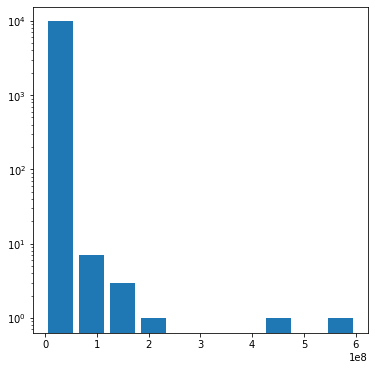

In [29]:
plt.hist(df3.Price, rwidth=0.8, log=True)
plt.rcParams['figure.figsize'] = (4,4)
plt.show()

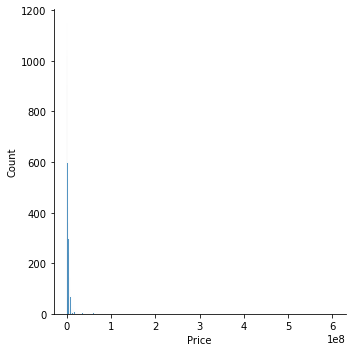

In [30]:
import seaborn as sns
sns.displot(df3.Price)

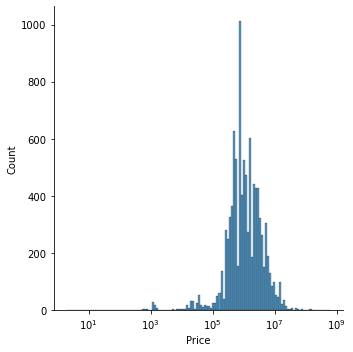

In [31]:
sns.displot(df3.Price, log_scale=True)

<h2 style='color: blue'>Price Outlier Remover using 1 standard deviation</h2>
Grouping it by Neighboorhood

In [32]:
def outlier_price_remover(df):
    out_df = pd.DataFrame()
    for location, location_df in df.groupby('Neighboorhood'):
        m = np.mean(location_df.Price)
        std = np.std(location_df.Price)    
        reduce_df = location_df[(location_df.Price >(m-std)) & (location_df.Price <=(m+std))]
        out_df = pd.concat([out_df, reduce_df], ignore_index=True)
    return out_df 
df4 = outlier_price_remover(df3)
# df4.head()

In [33]:
def outlier_price_remover(df):
    view = {}
#     out_df = pd.DataFrame()
    for location, location_df in df.groupby('Neighboorhood'):
        m = np.mean(location_df.Price)
        std = np.std(location_df.Price)    
        reduce_df = location_df[(location_df.Price >(m-std)) & (location_df.Price <=(m+std))]
#         out_df = pd.concat([out_df, reduce_df], ignore_index=True)
        view[location] = (m-std, m+std)
    return view #out_df 
std_value = outlier_price_remover(df3)
std_value

{'Abule-Egba': (-5773712.897539191, 8280855.754682049),
 'Agege': (-1515709.5036036416, 3872138.075032213),
 'Ajah': (-444004.4201112344, 2500140.783747598),
 'Alapere': (-3109979.642030904, 5390450.2302661985),
 'Alimosho': (-289852.4284947087, 1449593.8078050534),
 'Amuwo-Odofin': (266175.6996162776, 1730923.580959262),
 'Apapa': (-62541396.08479428, 95947112.21382654),
 'Badagry': (-1073309.13132693, 3827426.7783857537),
 'Bariga': (245187.15763533727, 779176.478728299),
 'Ejigbo': (-771375.8409852625, 3421375.8409852628),
 'Epe': (12000000.0, 12000000.0),
 'Gbagada': (397259.30758912314, 1940504.902937193),
 'Ibeju-Lekki': (-270805.97120910394, 2205421.355824488),
 'Idimu': (-793252.6697840884, 2267697.1142285326),
 'Ifako-Ijaiye': (452099.8687664699, 714566.7979001969),
 'Igando': (-705657.4272320521, 2513950.110158881),
 'Ijora': (20000.0, 20000.0),
 'Ikeja': (-17976586.959912162, 25367997.88785148),
 'Ikorodu': (-13693984.916083507, 18973283.11967632),
 'Ikosi': (-48120.71970426

In [34]:
def outlier_price_remover_p_type(df):
    out_df = pd.DataFrame()
    for location, location_df in df.groupby('property_type'):
        m = np.mean(location_df.Price)
        std = np.std(location_df.Price)    
        reduce_df = location_df[(location_df.Price >(m-std)) & (location_df.Price <=(m+std))]
        out_df = pd.concat([out_df, reduce_df], ignore_index=True)
    return out_df 
df4 = outlier_price_remover_p_type(df4)
# df4.head()

In [35]:
def outlier_price_remover_p_type(df):
    view = {}
#     out_df = pd.DataFrame()
    for location, location_df in df.groupby('property_type'):
        m = np.mean(location_df.Price)
        std = np.std(location_df.Price)    
        reduce_df = location_df[(location_df.Price >(m-std)) & (location_df.Price <=(m+std))]
#         out_df = pd.concat([out_df, reduce_df], ignore_index=True)
        view[location] = (m-std, m+std)
    return view #out_df 
std_value_by_type = outlier_price_remover(df4)
std_value_by_type

{'Abule-Egba': (-12108.362674562843, 973398.685255208),
 'Agege': (226824.93027683639, 1102609.0319873146),
 'Ajah': (415151.846766326, 1409434.4416497499),
 'Alapere': (369906.58451358514, 961451.4401777729),
 'Alimosho': (211081.43608237835, 633640.7861398439),
 'Amuwo-Odofin': (542430.6267584797, 1212199.00287115),
 'Apapa': (-222325.34022385068, 2564368.197366708),
 'Badagry': (132105.91499022496, 505036.94215263217),
 'Bariga': (319030.38929146144, 680969.6107085386),
 'Ejigbo': (221477.0045364728, 558522.9954635272),
 'Gbagada': (625425.9428440015, 1296002.6285845698),
 'Ibeju-Lekki': (184820.21357002557, 1075634.33188452),
 'Idimu': (175893.11364297068, 561753.9451805587),
 'Ifako-Ijaiye': (650000.0, 700000.0),
 'Igando': (89107.55352009967, 861945.0780588477),
 'Ikeja': (467578.4199544431, 3458749.514471786),
 'Ikorodu': (-131050.83593649312, 1170407.1273272214),
 'Ikosi': (200158.20020675717, 944541.7997932428),
 'Ikoyi': (3099481.018423322, 5902460.729149492),
 'Ilupeju': (59

In [36]:
print(df4.shape)
df3.shape[0]-df4.shape[0]

(8179, 5)


1633

In [37]:
df4.Price.describe()

count    8.179000e+03
mean     1.330466e+06
std      1.251159e+06
min      2.000000e+00
25%      5.000000e+05
50%      8.500000e+05
75%      1.800000e+06
max      6.700000e+06
Name: Price, dtype: float64

In [38]:
list(df4.Price.describe())

[8179.0,
 1330466.040102702,
 1251159.123082452,
 2.0,
 500000.0,
 850000.0,
 1800000.0,
 6700000.0]

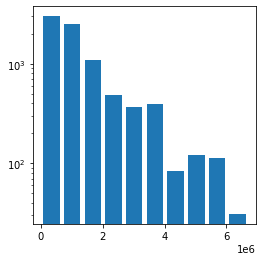

In [39]:
plt.hist(df4.Price, rwidth=0.8, log=True)
plt.show()

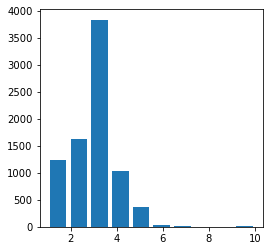

In [40]:
plt.hist(df4.bedroom, rwidth=0.8)
plt.rcParams['figure.figsize'] = (6, 6)

<h2 style='color: blue'>Bedroom Outlier Remover</h2>
<h3 style='color: purple'>Removing rows with no. of bedroom higher then 7 bedrooms</h3>

In [41]:
print(df4[df4.bedroom >= 8].shape)
df5 = df4[df4.bedroom < 8]
df5.head()

(17, 5)


,Price,Property_name,Neighboorhood,property_type,bedroom
0,200000,3 bedroom Bungalow for rent Toll Gate Alagbado...,Abule-Egba,bungalow,3
1,350000,2 bedroom Bungalow for rent Oja Oba Abule Egba...,Abule-Egba,bungalow,2
2,1000000,4 bedroom Bungalow for rent Fagba Agege Lagos,Agege,bungalow,4
3,600000,3 bedroom Bungalow for rent Alexander estate O...,Agege,bungalow,3
4,650000,3 bedroom Bungalow for rent off Jonathan Coker...,Agege,bungalow,3


(array([1248., 1635.,    0., 3841.,    0., 1033.,  360.,    0.,   29.,
          16.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

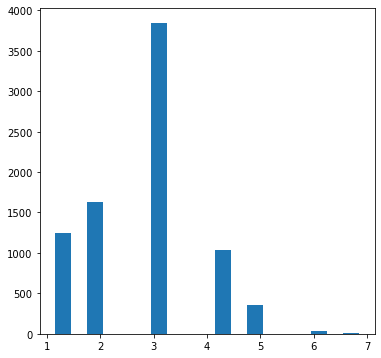

In [42]:
plt.hist(df5.bedroom, rwidth=0.5)

<h2 style='color: blue'>Comparing Price of 2 bedroom & 3 bedroom in same Neighboorhood</h2>

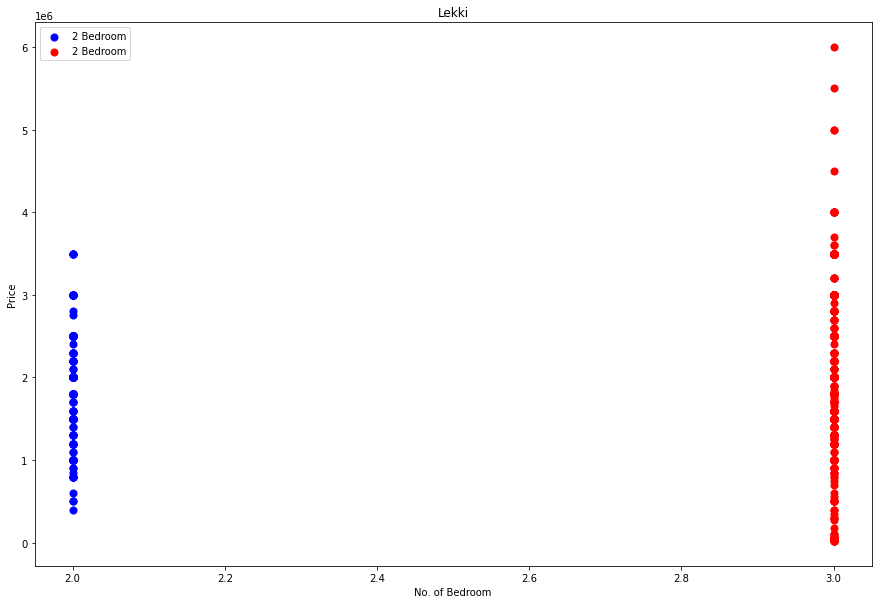

In [43]:
def plot_scatter_plot(df, location):
    bedroom2 = df[(df.Neighboorhood == location) & (df.bedroom == 2)]
    bedroom3 = df[(df.Neighboorhood == location) & (df.bedroom == 3)]
    plt.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bedroom2.bedroom, bedroom2.Price, color='blue', label='2 Bedroom', s=50)
    plt.scatter(bedroom3.bedroom, bedroom3.Price, color='red', label='2 Bedroom', s=50) 
    plt.xlabel('No. of Bedroom')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    

plot_scatter_plot(df5, 'Lekki')    

In [44]:
def bedroom_outlier_remover(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Neighboorhood'):
        bedroom_stats = {}
        for br, br_df in location_df.groupby('bedroom'):
            bedroom_stats[br] = {
                'mean': np.mean(br_df.Price),
                'std': np.std(br_df.Price),
                'count': br_df.shape[0]
            }
        for br, br_df in location_df.groupby('bedroom'):
            stats = bedroom_stats.get(br-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, br_df[br_df.Price<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')
    
df6 = bedroom_outlier_remover(df5)
df6.shape

(6702, 5)

In [45]:
df5.shape[0]-df6.shape[0]

1460

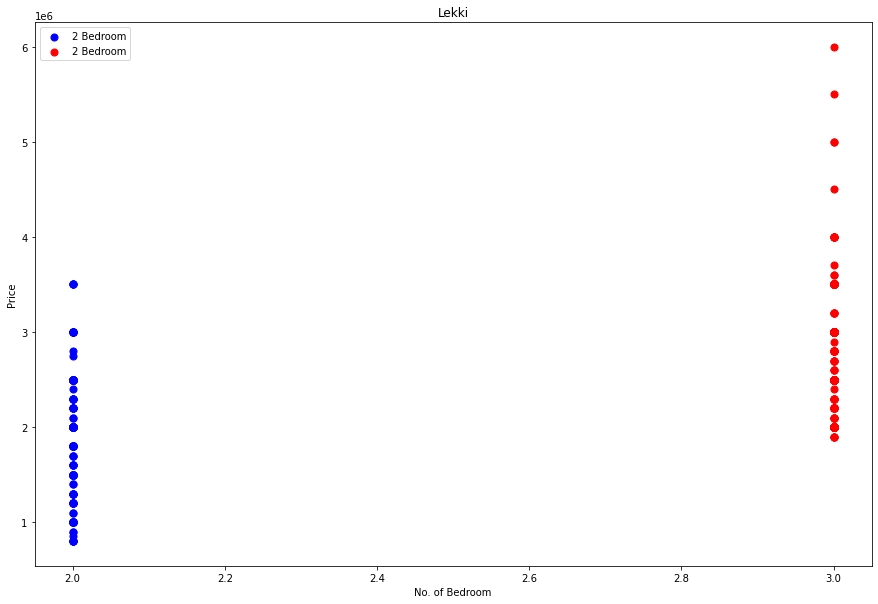

In [46]:
plot_scatter_plot(df6, 'Lekki')    

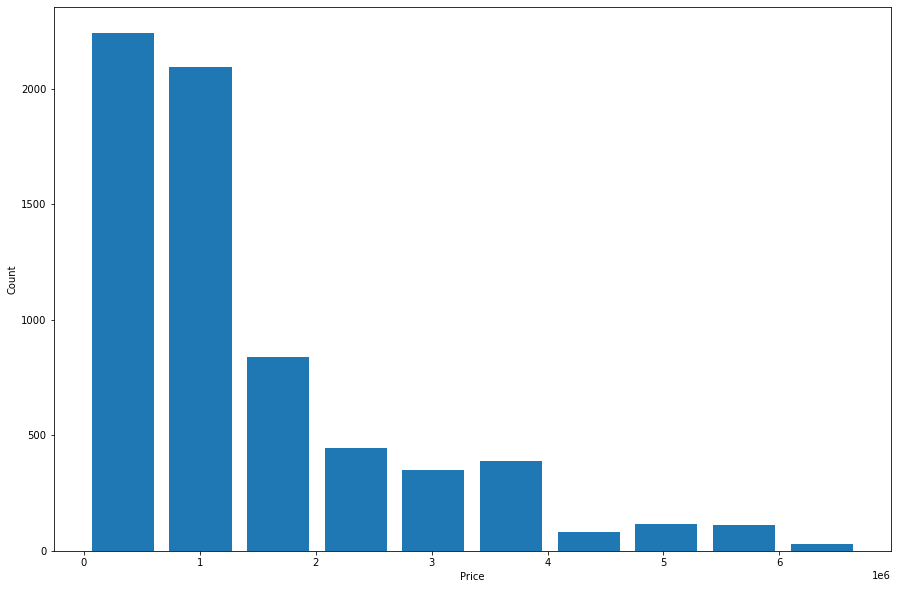

In [47]:
plt.hist(df6.Price, rwidth=0.8)
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [48]:
df7 = df6.drop('Property_name', axis='columns')
df7.head()

,Price,Neighboorhood,property_type,bedroom
1,350000,Abule-Egba,bungalow,2
2,1000000,Agege,bungalow,4
3,600000,Agege,bungalow,3
4,650000,Agege,bungalow,3
5,1200000,Ajah,bungalow,4


In [49]:
df7.property_type.value_counts()

flat                   3923
duplex                 1214
mini flat              1002
self contain            191
office space            186
bungalow                 73
commercial property      58
shop                     55
Name: property_type, dtype: int64

In [50]:
property_type_dummies = pd.get_dummies(df7.property_type)
property_type_dummies.head()

,bungalow,commercial property,duplex,flat,mini flat,office space,self contain,shop
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0


In [51]:
location_dummies = pd.get_dummies(df7.Neighboorhood)
location_dummies.head(3)

,Abule-Egba,Agege,Ajah,Alapere,Alimosho,Amuwo-Odofin,Apapa,Badagry,Bariga,Ejigbo,...,Ojo,Okota,Orile,Oshodi,Sangotedo,Shomolu,Surulere,VGC,VI,Yaba
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df8 = pd.concat([df7, property_type_dummies, location_dummies], axis='columns')
# df8 = pd.concat([df7, location_dummies], axis='columns')
df8.head(3)

,Price,Neighboorhood,property_type,bedroom,bungalow,commercial property,duplex,flat,mini flat,office space,...,Ojo,Okota,Orile,Oshodi,Sangotedo,Shomolu,Surulere,VGC,VI,Yaba
1,350000,Abule-Egba,bungalow,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000000,Agege,bungalow,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,600000,Agege,bungalow,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df9 = df8.drop(['Neighboorhood', 'property_type', 'shop', 'Yaba'], axis='columns')
columns_df = df8.drop(['Neighboorhood', 'property_type', 'Price'], axis='columns')
model_column_df = df9.copy()
model_column_df = model_column_df.drop('Price', axis='columns')
df9.head(3)

,Price,bedroom,bungalow,commercial property,duplex,flat,mini flat,office space,self contain,Abule-Egba,...,Ogudu,Ojo,Okota,Orile,Oshodi,Sangotedo,Shomolu,Surulere,VGC,VI
1,350000,2,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1000000,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,600000,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
x = df9.drop('Price', axis='columns').values
x[:1]

array([[2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]], dtype=int64)

In [55]:
y = df9.Price
y.head(3)

1     350000
2    1000000
3     600000
Name: Price, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(df9.shape[0], x_train.shape[0], x_test.shape[0])

6702 5361 1341


In [57]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.81592040045128

#### Use K Fold Cross Validation to check the accuracy of our LinearRegression model

In [58]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.8159204 , 0.82872378, 0.83692563, 0.83531468, 0.83405748])

### Find the best model using GridSeachCV

In [59]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearch(x, y):
    algos = {
        'LinearRegression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'Decision_Tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'Model': algo_name,
            'Best Score': gs.best_score_,
            'Best Params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['Model', 'Best Score', 'Best Params']) 
find_best_model_using_gridsearch(x, y)

C:\Users\CELESTINE TYJC\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\CELESTINE TYJC\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make

,Model,Best Score,Best Params
0,LinearRegression,0.830188,{'normalize': True}
1,lasso,0.830188,"{'alpha': 1, 'selection': 'cyclic'}"
2,Decision_Tree,0.850814,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [60]:
tree_model = DecisionTreeRegressor(criterion='friedman_mse', splitter='best')
tree_model.fit(x_train, y_train)
tree_model.score(x_test, y_test)

0.8334433574054125

In [61]:
# Train set
tree_model.score(x_train, y_train)

0.8797940651361245

In [62]:
import pickle
with open('lagos_prediction_using_tree_now.pickle', 'wb') as f:
    pickle.dump(tree_model, f)

In [63]:
import json
location_columns = {
    'location': [val.lower() for val in columns_df.columns]
}

model_columns = {
    'model_columns': [val.lower() for val in model_column_df]
}

with open('lagos_columns_now.json', 'w') as f:
    f.write(json.dumps(location_columns))
    
with open('model_columns_now.json', 'w') as f:
    f.write(json.dumps(model_columns))

In [117]:
def price_estimator(location, p_type, bedroom):
    try:
        loc_index = model_columns['model_columns'].index(location.lower())
    except:
        loc_index = -1
    try:
        type_index = model_columns['model_columns'].index(p_type.lower())
    except:
        type_index = -1 
        
    b = np.zeros(len(model_columns['model_columns']))
    b[0] = bedroom
    if loc_index >= 0:
        b[loc_index] = 1
    if type_index >= 0:
        b[type_index] = 1
    
    num = round(tree_model.predict([b])[0])
    return f'{num:,}'

price_estimator('agege', 'bungalow', 5)   

'1,500,000'

In [95]:
def get_estimated_price(location, p_type, bhk):
    try:
        loc_index = model_columns['model_columns'].index(location.lower())
    except:
        loc_index = -1
    try:
        type_index = model_columns['model_columns'].index(p_type.lower())
    except:
        type_index = -1

    z = np.zeros(len(model_columns['model_columns']))
    z[0] = bhk

    if loc_index >= 0:
        z[loc_index] = 1
    if type_index >= 0:
        z[type_index] = 1
    num = round(tree_model.predict([z])[0])
    return f'{num:,}'

get_estimated_price('yaba', 'flat', 5)

'1,500,000'

In [66]:
len(model_columns['model_columns'])

46

In [67]:
'Alimosho'.lower() in location_columns['location']

True

In [68]:
location_columns['location'].index('idimu'.lower())

21

In [70]:
location_columns['location'][1:9]

['bungalow',
 'commercial property',
 'duplex',
 'flat',
 'mini flat',
 'office space',
 'self contain',
 'shop']